### Problem Statement
#### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


In [1503]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the loan.csv file into pandas dataframe
loan = pd.read_csv(r"C:\Users\pruth\Desktop\Lending_Club_Case_Study\loan.csv", sep=',', error_bad_lines=False, encoding = "ISO-8859-1", dtype='unicode')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [1504]:
#Determining the number of rows and columns in the dataframe
loan.shape

(39717, 111)

In [1505]:
#Understanding the datatypes of the columns 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [1506]:
#Determining the range of values each column takes
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,474232,948293,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [1507]:
#Calculating the sum of null values in each column of the dataframe
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1508]:
#Finding the columns whose total null value percentage is more than zero.
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [1509]:
#Determining the number of missing value columns
missing_value_columns = list(missing[missing >= 50].index)
len(missing_value_columns)

57

In [1510]:
#Determining the shape of the dataframe after dropping redundant columns
loan = loan.drop(missing_value_columns,axis=1)
loan.shape

(39717, 54)

In [1511]:
#Retrieving the columns having null values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [1512]:
#Dropping the columns 'desc'
loan = loan.drop("desc" ,axis=1)

In [1513]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [1514]:
#Determining the number of unique values in each column
for col in list(loan):
    print(col, end ='\n')
    print(len(loan[col].unique()))

id
39717
member_id
39717
loan_amnt
885
funded_amnt
1041
funded_amnt_inv
8205
term
2
int_rate
371
installment
15383
grade
7
sub_grade
35
emp_title
28821
emp_length
12
home_ownership
5
annual_inc
5318
verification_status
3
issue_d
55
loan_status
3
pymnt_plan
1
url
39717
purpose
14
title
19616
zip_code
823
addr_state
50
dti
2868
delinq_2yrs
11
earliest_cr_line
526
inq_last_6mths
9
open_acc
40
pub_rec
5
revol_bal
21711
revol_util
1090
total_acc
82
initial_list_status
1
out_prncp
1137
out_prncp_inv
1138
total_pymnt
37850
total_pymnt_inv
37518
total_rec_prncp
7976
total_rec_int
35148
total_rec_late_fee
1356
recoveries
4040
collection_recovery_fee
2616
last_pymnt_d
102
last_pymnt_amnt
34930
last_credit_pull_d
107
collections_12_mths_ex_med
2
policy_code
1
application_type
1
acc_now_delinq
1
chargeoff_within_12_mths
2
delinq_amnt
1
pub_rec_bankruptcies
4
tax_liens
2


#### Analysing the categorical variables

In [1515]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [1516]:
loan.collections_12_mths_ex_med.unique()

array(['0', nan], dtype=object)

In [1517]:
loan.chargeoff_within_12_mths.unique()

array(['0', nan], dtype=object)

In [1518]:
loan.pub_rec_bankruptcies.unique()

array(['0', '1', '2', nan], dtype=object)

In [1519]:
loan.tax_liens.unique()

array(['0', nan], dtype=object)

In [1520]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)
loan.shape

(39717, 50)

In [1521]:
loan.pub_rec_bankruptcies.value_counts()

0    37339
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64

In [1522]:
loan = loan[~loan.pub_rec_bankruptcies.isnull()]

In [1523]:
nulls = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
nulls[nulls > 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [1524]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [1525]:
loan.shape

(36433, 50)

In [1526]:
#Re-verifying the number of null values in all the columns
round(100*(loan.isnull().sum()/len(loan.id)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_

In [1527]:
#copying the cleaned dataframe to a new dataframe
clean_loan = loan[:]

In [1528]:
#Determining thee number of unique values in each column
clean_loan.nunique().sort_values(ascending = True)

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [1529]:
#Drop redundant columns
clean_loan = clean_loan.drop(columns=['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan'], axis = 1)

There are other columns which do not contribute to our analysis and hence can be dropped.

In [1530]:
#Drop redundant columns
clean_loan = clean_loan.drop(columns=['id','member_id','funded_amnt_inv','url','zip_code'], axis=1)
clean_loan.shape

(36433, 39)

In [1531]:
#Write the cleaned dataset to a new file
clean_loan.to_csv('clean_loan_final.csv', encoding='utf-8', index=False)

In [1532]:
#copy the cleaned dataset to a new dataframe
clean_loan_final = clean_loan[:]
clean_loan_final.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0
5,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0
6,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,...,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,May-16,0
7,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,...,3939.14,3000,939.14,0,0,0,Jan-15,111.34,Dec-14,0
9,5375,5375,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,...,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,Mar-13,0
10,6500,6500,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,...,7678.02,6500,1178.02,0,0,0,Jun-13,1655.54,Dec-15,0
11,12000,12000,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,...,13947.99,12000,1947.99,0,0,0,Sep-13,6315.3,Aug-13,0
12,9000,9000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,...,2270.7,1256.14,570.26,0,444.3,4.16,Jul-12,305.38,Nov-12,0


In [1533]:
#Analysing int-rate Column
clean_loan_final.int_rate.head()

1    15.27%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
Name: int_rate, dtype: object

In [1534]:
clean_loan_final['int_rate'] = clean_loan_final.int_rate.str.strip('%').astype('float')
clean_loan_final.int_rate.head()

1    15.27
3    13.49
4    12.69
5     7.90
6    15.96
Name: int_rate, dtype: float64

In [1535]:
clean_loan_final.revol_util.head()

1     9.40%
3       21%
4    53.90%
5    28.30%
6    85.60%
Name: revol_util, dtype: object

In [1536]:
clean_loan_final['revol_util'] = clean_loan_final['revol_util'].str.strip('%').astype('float')
clean_loan_final.revol_util.head()

1     9.4
3    21.0
4    53.9
5    28.3
6    85.6
Name: revol_util, dtype: float64

In [1537]:
clean_loan_final.emp_length.unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [1538]:
clean_loan_final.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [1539]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [1540]:
emp_length_dict

{'< 1 year': 0,
 '1 year': 1,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '10+ years': 10}

In [1541]:
clean_loan_final = clean_loan.replace({"emp_length": emp_length_dict })

In [1542]:
clean_loan_final.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [1543]:
clean_loan_final['term'] = clean_loan_final.term.apply(lambda x: x.split()[0])

In [1544]:
clean_loan_final.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [1545]:
clean_loan_final['issue_d'].head(20)

1     Dec-11
3     Dec-11
4     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
13    Dec-11
14    Dec-11
15    Dec-11
16    Dec-11
17    Dec-11
18    Dec-11
19    Dec-11
20    Dec-11
21    Dec-11
22    Dec-11
Name: issue_d, dtype: object

In [1546]:
clean_loan_final['total_pymnt'] = clean_loan_final['total_pymnt'].astype(float).round(decimals=2)
clean_loan_final['total_rec_late_fee'] = clean_loan_final['total_rec_late_fee'].astype(float).round(decimals=2)
clean_loan_final['collection_recovery_fee'] = clean_loan_final['collection_recovery_fee'].astype(float).round(decimals=2)

In [1547]:
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [1548]:
clean_loan_final.issue_d = pd.to_datetime(clean_loan_final.issue_d, format='%b-%y')
clean_loan_final.earliest_cr_line = pd.to_datetime(clean_loan_final.earliest_cr_line, format='%b-%y')
clean_loan_final.last_pymnt_d = pd.to_datetime(clean_loan_final.last_pymnt_d, format='%b-%y')
clean_loan_final.last_credit_pull_d = pd.to_datetime(clean_loan_final.last_credit_pull_d, format='%b-%y')

In [1549]:
clean_loan_final.issue_d

1       2011-12-01
3       2011-12-01
4       2011-12-01
5       2011-12-01
6       2011-12-01
           ...    
39551   2007-12-01
39562   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36433, dtype: datetime64[ns]

In [1550]:
clean_loan_final['earliest_cr_line']

1       1999-04-01
3       1996-02-01
4       1996-01-01
5       2004-11-01
6       2005-07-01
           ...    
39551   2000-12-01
39562   2000-03-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 36433, dtype: datetime64[ns]

In [1551]:
clean_loan_final['earliest_cr_line_month'] = clean_loan_final['earliest_cr_line'].dt.month
clean_loan_final['earliest_cr_line_year'] = clean_loan_final['earliest_cr_line'].dt.year

In [1552]:
clean_loan_final['earliest_cr_line_year'].value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

In [1553]:
clean_loan_final.loc[clean_loan_final['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan_final['earliest_cr_line_year'] - 100

In [1554]:
clean_loan_final.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [1555]:
clean_loan_final['issue_d_month'] = clean_loan_final['issue_d'].dt.month
clean_loan_final['issue_d_year'] = clean_loan_final['issue_d'].dt.year

In [1556]:
clean_loan_final.to_csv('master_loan.csv', encoding='utf-8', index=False)

## Analysis

In [1557]:
#Loading the clean dataset into master_loan dataframe
master_loan = clean_loan_final[:]

In [1558]:
#Determing the shape of the dataframe
master_loan.shape

(36433, 43)

In [1559]:
master_loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,2500,60,15.27%,59.83,C,C4,Ryder,0,RENT,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0,4,1999,12,2011
3,10000,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,...,0,0.00,2015-01-01,357.48,2016-04-01,0,2,1996,12,2011
4,3000,3000,60,12.69%,67.79,B,B5,University Medical Group,1,RENT,...,0,0.00,2016-05-01,67.79,2016-05-01,0,1,1996,12,2011
5,5000,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3,RENT,...,0,0.00,2015-01-01,161.03,2016-01-01,0,11,2004,12,2011
6,7000,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8,RENT,...,0,0.00,2016-05-01,1313.76,2016-05-01,0,7,2005,12,2011


In [1560]:
master_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [1561]:
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

### Univariate Analysis

#### Analysing loan_status column

In [1562]:
#Determining the frequency of values for the categorical variable
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [1563]:
#Percentage of loans charged-off

print(round(100*(master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count()/len(master_loan))))

14.0


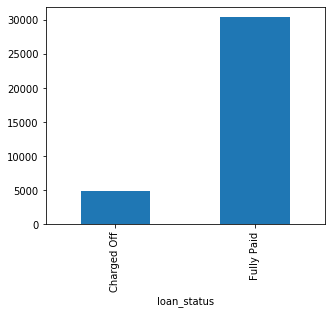

In [1564]:
plt.figure(figsize=(5,4))
master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

#### Conclusion

1)Majority of the loans are Fully Paid.

2)About 14% of loans are defaulted

#### Analysing grade column

In [1565]:
master_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [1566]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_values(ascending=False)

B    30.305087
A    25.843300
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

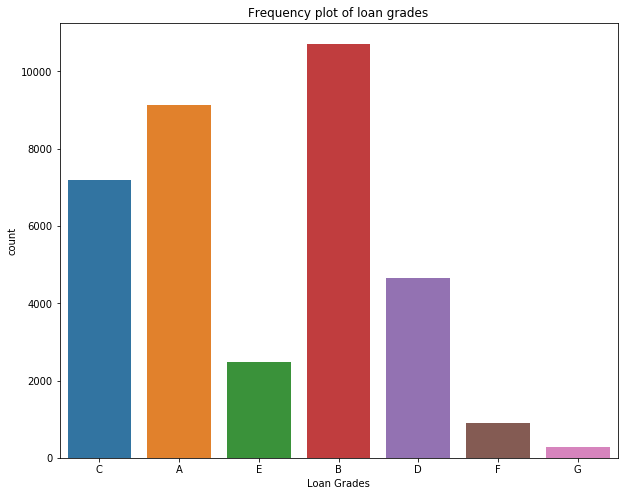

In [1567]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='grade', data=master_loan)
plt.title("Frequency plot of loan grades")
plt.xlabel('Loan Grades')
plt.show()

#### Conclusion
Most of the loans issued are of grade A or grade B

#### Analysing emp_length_years column

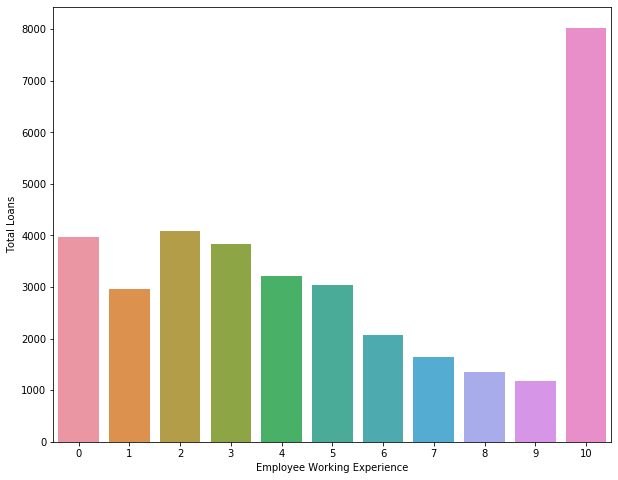

In [1568]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='emp_length', data=master_loan)
plt.xlabel('Employee Working Experience')
plt.ylabel('Total Loans')
plt.show()

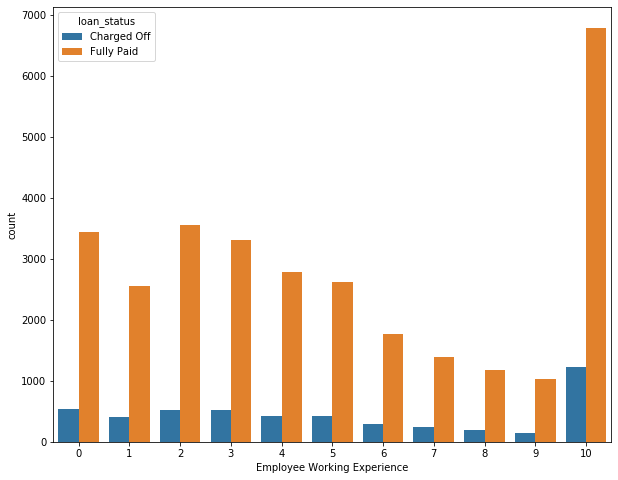

In [1569]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='emp_length', hue='loan_status', data=master_loan)
plt.xlabel('Employee Working Experience')
plt.show()

#### Conclusion
Majority of loan applicants have more than 10 years of work experience

Most of the loan defaulters are having more than 10 years of work experience

#### Analysing annual_inc column

In [1570]:
master_loan['annual_inc'].astype(float).describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [1571]:
master_loan['annual_inc'] = master_loan['annual_inc'].astype(float)/100000

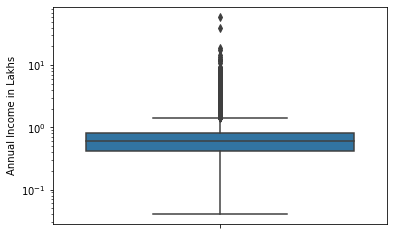

In [1572]:
sns.boxplot(y=master_loan['annual_inc'].astype(float))
plt.ylabel('Annual Income in Lakhs')
plt.yscale('log')
plt.show()

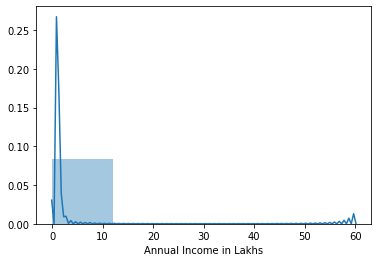

In [1573]:
sns.distplot(master_loan[master_loan['annual_inc'].astype(float) < 2000]['annual_inc'].astype(float), bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

In [1574]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'].astype(float), [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


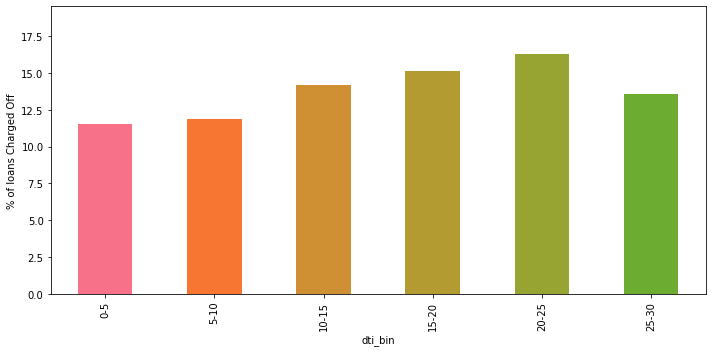

In [1575]:
plt.figure(figsize=(10,5))

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

plotLoanStatus(master_loan, 'dti_bin')

#### Majority of loan applicants have income less than 5 lakhs 

Median annual income of the loan applicants is around 60000.
Majority of the applicants have income less than 5 lakhs.
Applicants having income range of 20-25k tend to default more

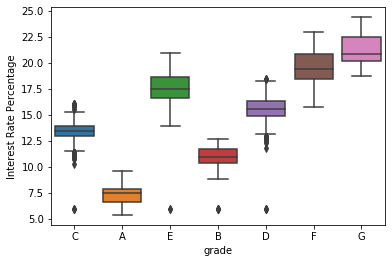

In [1576]:
#determine the relationship between Interest rate and Grade
master_loan['int_rate'] = master_loan['int_rate'].str.strip('%')
sns.boxplot(y=master_loan['int_rate'].astype(float), x=master_loan['grade'], data=master_loan)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### Lower Interest rates are provided for loan applicants having grade A and grade B

#### Analysing purpose column

In [1577]:
master_loan.purpose.value_counts()

debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

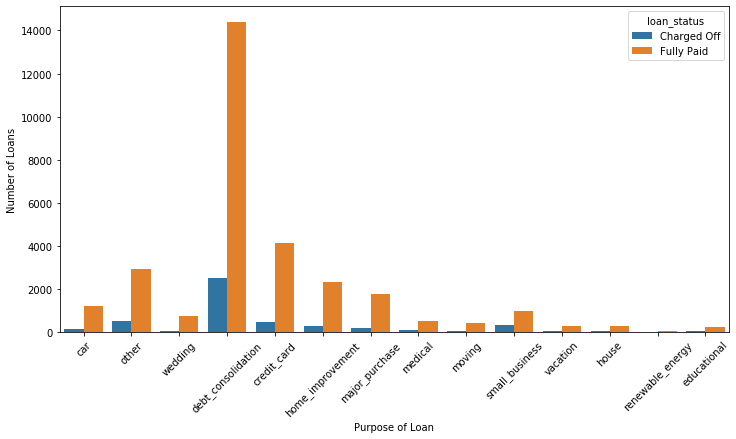

In [1578]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue="loan_status", data=master_loan)
plt.xticks(rotation=45)
plt.ylabel('Number of Loans')
plt.xlabel('Purpose of Loan')
plt.show()

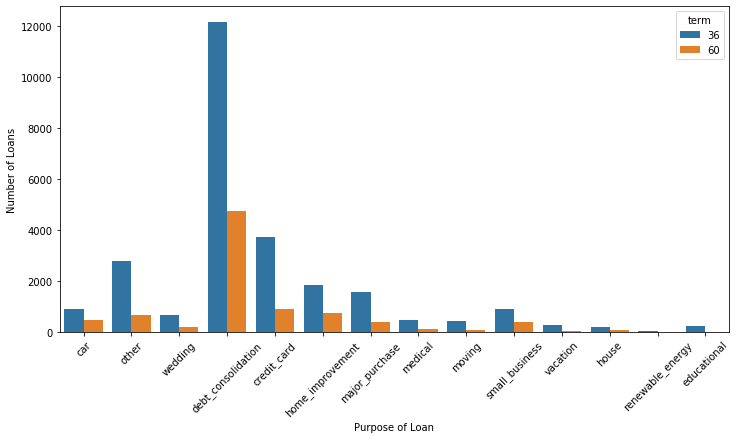

In [1579]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue="term", data=master_loan)
plt.xticks(rotation=45)
plt.ylabel('Number of Loans')
plt.xlabel('Purpose of Loan')
plt.show()

Majority of the loans were taken on debt consolidation purpose

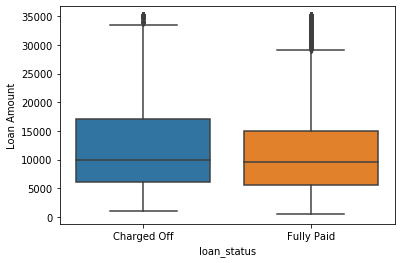

In [1580]:
sns.boxplot( y=master_loan['loan_amnt'].astype(float), x='loan_status' , data=master_loan)
plt.ylabel('Loan Amount')
plt.show()

Median value of loan amount for current loans is higher that of fully paid loans and defaulted loans

#### Performing analysis on int_rate column

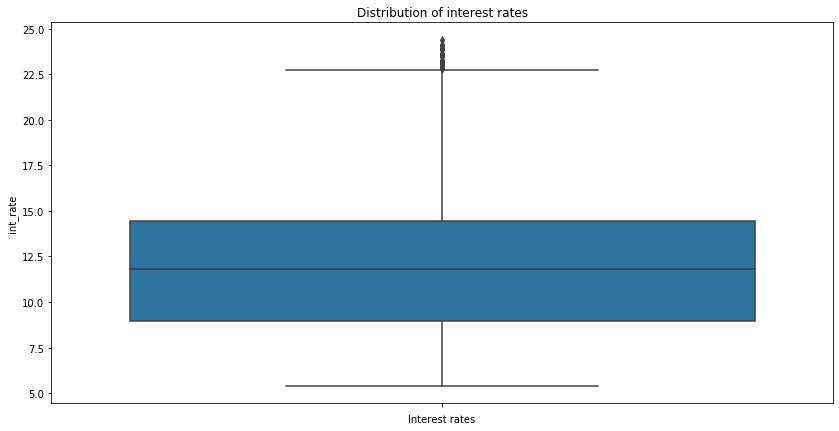

In [1581]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y=master_loan['int_rate'].astype(float), data=master_loan)
plt.title('Distribution of interest rates')
plt.xlabel('Interest rates')
plt.show()

In [1582]:
master_loan['int_rate'] = master_loan['int_rate'].astype('float')
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


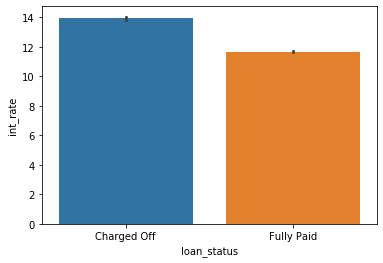

In [1583]:
sns.barplot(y = 'int_rate' , x = 'loan_status', data = master_loan)
plt.show()

Higher interest rate loans are charged off to the higher extent

#### Analysing loan_amt column

In [1584]:
master_loan['loan_amnt'] = master_loan['loan_amnt'].astype(float)
master_loan['funded_amnt'] = master_loan['funded_amnt'].astype(float)

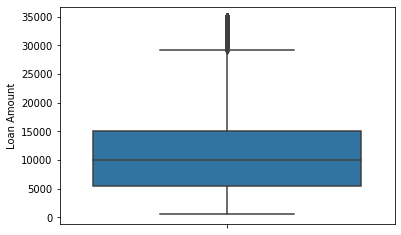

In [1585]:
sns.boxplot( y=master_loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

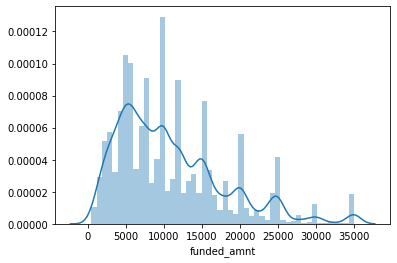

In [1586]:
sns.distplot(master_loan['funded_amnt'])
plt.show()

Funded amount is left skewed

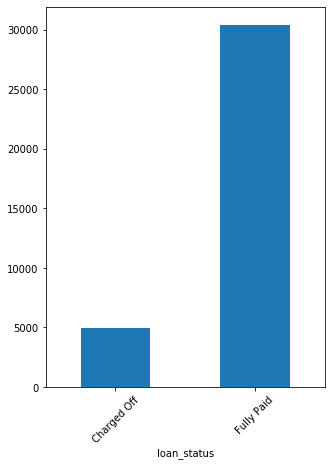

In [1587]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.xticks(rotation=45)
plt.show()

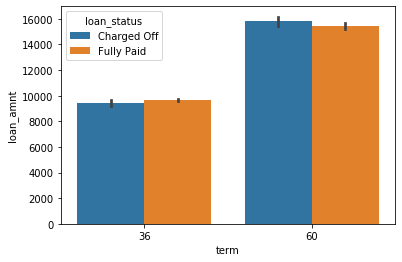

In [1588]:
sns.barplot(x='term', y=master_loan['loan_amnt'], hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

#### Analysing addr_state column

In [1589]:
100*master_loan['addr_state'].value_counts(normalize=True).sort_values(ascending=False)

CA    18.084655
NY     9.573897
FL     7.167699
TX     6.935844
NJ     4.713433
IL     3.904770
PA     3.882150
VA     3.562643
GA     3.542851
MA     3.339271
OH     3.098934
MD     2.686120
AZ     2.143241
WA     2.035796
CO     1.928351
NC     1.900076
CT     1.849181
MI     1.812424
MO     1.721944
MN     1.566432
NV     1.249753
SC     1.193203
AL     1.122515
OR     1.122515
LA     1.099895
WI     1.094240
KY     0.828456
OK     0.769079
KS     0.658806
UT     0.647496
AR     0.610739
DC     0.573981
RI     0.523086
NM     0.460882
WV     0.443917
HI     0.432607
NH     0.418469
DE     0.296887
WY     0.212062
AK     0.206407
MT     0.200752
SD     0.155512
VT     0.132892
MS     0.050895
TN     0.028275
ID     0.008482
IA     0.002827
NE     0.002827
IN     0.002827
Name: addr_state, dtype: float64

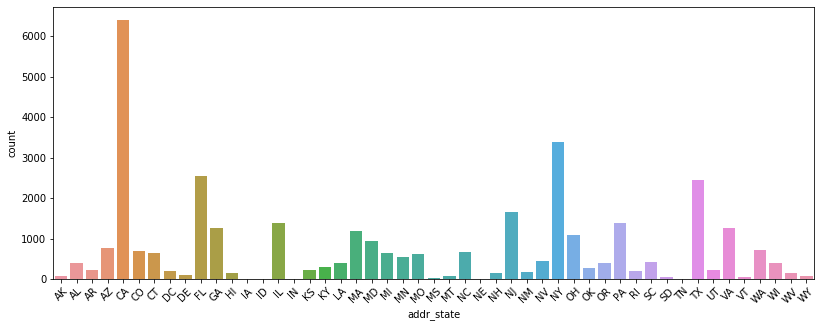

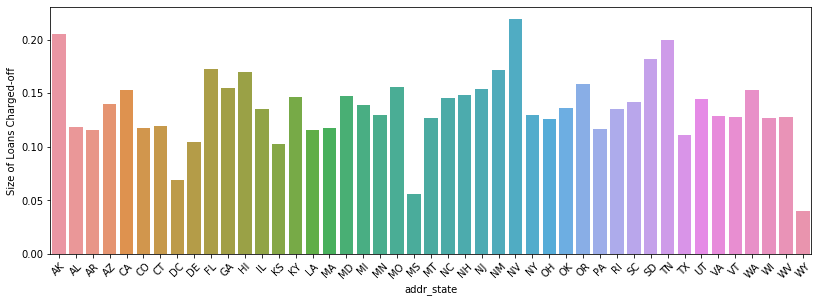

In [1590]:
plt.figure(figsize=(30,5))

plt.subplot(1, 2, 1)
sns.countplot(master_loan['addr_state'], order=sorted(master_loan.addr_state.unique()))
plt.xticks(rotation=45)

#Fraction of loans charged off and fully Paid

charge_off_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))

plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('Size of Loans Charged-off')
plt.xticks(rotation=45)

plt.show()


#### Conclusion

Maximum number of loans are from California State(18%) and New York state(9%). 
States with higher Charge Off rates have very low number of loans. 
This variable can be ignored, as it doesn't depict any characteristic of the data.

#### Analysing dti column

In [1591]:
master_loan.dti = master_loan.dti.astype(float)
master_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

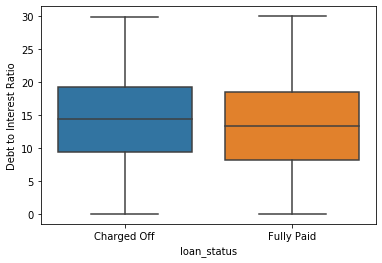

In [1592]:
sns.boxplot( y=master_loan["dti"], x=master_loan["loan_status"])
plt.ylabel('Debt to Interest Ratio')
plt.show()

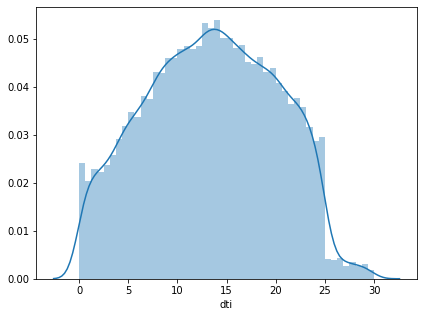

In [1593]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(master_loan['dti'])

Most of the loans being defaulted have dti ranging from 10-20

#### Analysing delinq_2yrs column

In [1594]:
master_loan.delinq_2yrs = master_loan.delinq_2yrs.astype(float)

In [1595]:
master_loan.delinq_2yrs.value_counts()

0.0     31533
1.0      2939
2.0       614
3.0       189
4.0        53
5.0        21
6.0        10
7.0         4
8.0         2
11.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

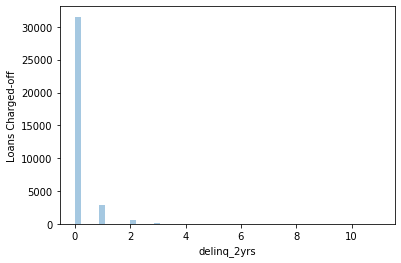

In [1596]:
a=sns.distplot(master_loan['delinq_2yrs'], kde=False)
a.set_ylabel('Loans Charged-off')

plt.show()

There are higher chances of default if the dti is 0 or 1

#### Analysing pub_rec_bankruptcy column

In [1597]:
master_loan['pub_rec_bankruptcies'] = master_loan['pub_rec_bankruptcies'].astype(float)

In [1598]:
master_loan['pub_rec_bankruptcies'].value_counts()

0.0    33898
1.0     1464
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [1599]:
q = (master_loan['pub_rec_bankruptcies'].value_counts(normalize=True)*100).sort_values(ascending=False)
q.head(1)

0.0    95.84641
Name: pub_rec_bankruptcies, dtype: float64

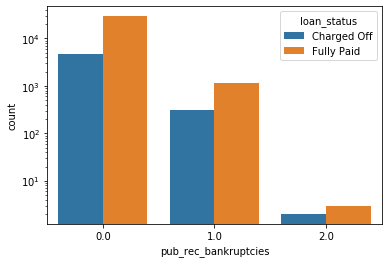

In [1600]:
sns.countplot(x = master_loan['pub_rec_bankruptcies'], hue = master_loan['loan_status'])

plt.yscale('log')
plt.show()

In [1601]:
def plotLoanStatus(master_loan, by, loanstatus='Charged Off'):
    grp = master_loan.groupby(['loan_status',by])[by].count()
    cnt = master_loan.groupby(by)[by].count()
    
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
   
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

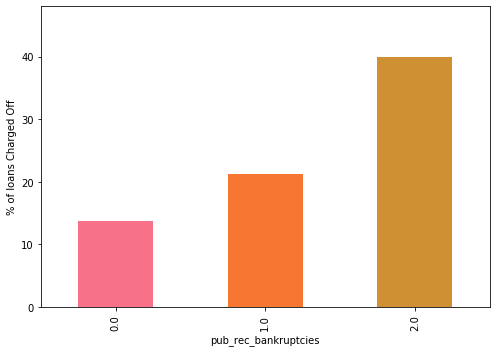

In [1602]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

The percentage of Charged Off loans is markedly higher when the loan borrower has a record of bankruptcy.